Hyperparameter and Model Verification
=================

Consideration about Model Verification
------

**wrong ways to verify model**

In [1]:
# loading datas
from sklearn.datasets import load_iris 
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
# selecting model class and hyperparameter
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [3]:
# train data
model.fit(X, y)
y_model = model.predict(X)

In [5]:
# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

**right way to verify model : holdout set**

In [6]:
from sklearn.cross_validation import train_test_split

# divide datas by 50%
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)

# train one of the datas using model
model.fit(X1, y1)

# verify model by second data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.9066666666666666

**cross-validation**

In [8]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [10]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

**leave-one-out cross validation**

In [12]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv = LeaveOneOut(len(X)))
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
scores.mean()

0.96

Choosing Optimum Model
---------

**Scikit-Learn Validation curve**

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynominalRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [15]:
import numpy as np

def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1./(X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

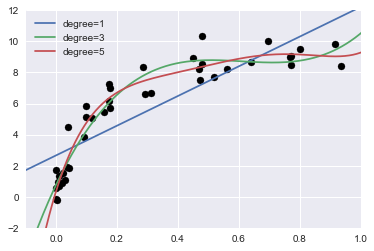

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynominalRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best')

Text(0,0.5,'score')

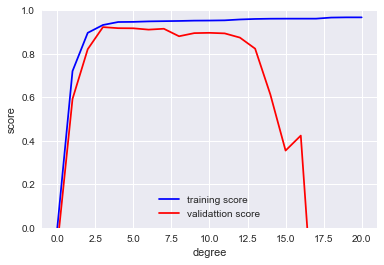

In [43]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynominalRegression(), X, y,
                                       'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'validattion score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

(-0.05837591284348665,
 0.9959064049396961,
 -0.7485237455039975,
 10.92057542617113)

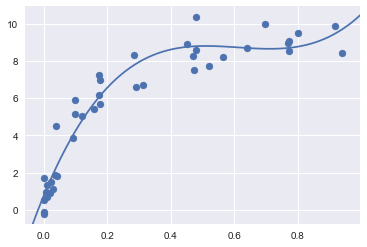

In [44]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynominalRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

Learning Curves
---------

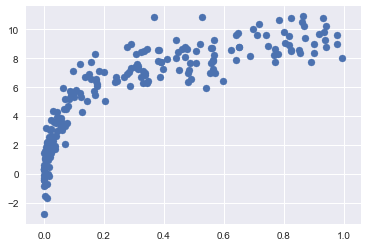

In [45]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

Text(0,0.5,'score')

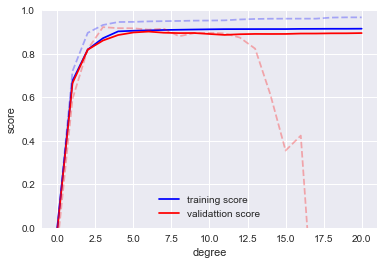

In [47]:
degree = np.arange(0, 21)
train_score2, val_score2 = validation_curve(PolynominalRegression(), X2, y2,
                                       'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score2, 1), color = 'red', label = 'validattion score')
plt.plot(degree, np.median(train_score, 1), color = 'blue', alpha = 0.3, linestyle = 'dashed')
plt.plot(degree, np.median(val_score, 1), color = 'red', alpha = 0.3, linestyle = 'dashed')
plt.legend(loc = 'lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

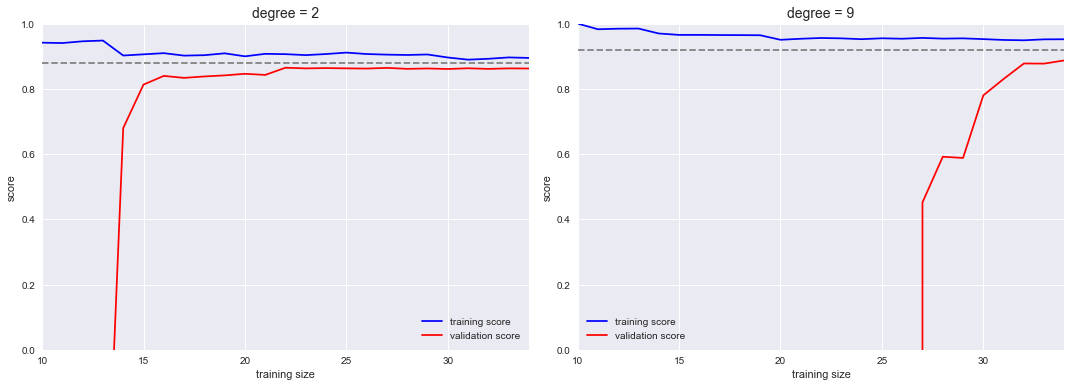

In [50]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynominalRegression(degree), X, y, cv = 7,
                                        train_sizes = np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color = 'blue', label = 'training score')
    ax[i].plot(N, np.mean(val_lc, 1), color = 'red', label = 'validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color = 'gray',
                linestyle = 'dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size = 14)
    ax[i].legend(loc = 'best')

Grid Search
------

In [54]:
from sklearn.grid_search import GridSearchCV

param_grid = {'polynomialfeatures__degree' : np.arange(21),
             'linearregression__fit_intercept' : [True, False],
             'linearregression__normalize' : [True, False]}

grid = GridSearchCV(PolynominalRegression(), param_grid, cv = 7)

In [55]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [56]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [ ]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold = True)
plt.axis(lim)